# Aprendizaje supervisado con redes neuronales

Dentro del mundo del machine learning, existe un tipo de tarea llamado **aprendizaje supervisado**  en el cual se cuenta con ejemplos etiquetados previamente.

Dentro del aprendizaje supervisado, por su parte, tenemos tareas de regresión y clasificación.

  - **Regresión** Se tiene en la salida un número real con infinitos valores posibles en un rango determinado. Algunas aplicaciones de la regresión que podemos encontrar son por ejemplo, la predicción del precio de una casa.
  - **Clasificación** Se tiene en la salida un conjunto finito de valores posibles. En el caso de la clasificación predecimos categorias. Un ejemplo de un algoritmo de clasificación podría ser la predicción una caries dados ciertos datos de un paciente.

En este notebook veremos 2 ejemplos de cada uno de estos algoritmos.

In [1]:
import numpy as np
import tensorflow as tf 
from sklearn.datasets import load_diabetes, load_breast_cancer


2021-10-14 20:13:12.273267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-14 20:13:12.273297: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Regresión: Predicción de la prevalencia de diabetes en distintas etapas

Desarrollaremos un modelo de predicción para un dataset que contiene información de 442 pacientes y una medida de la progresión de la enfermedad un año luego de la medición.

Los campos del dataset son los siguientes:
  
  - edad en años
  - sexo
  - índice de masa corporal
  - presión arterial promedio
  - conteo de células T
  - lipoproteinas de baja densidad
  - lipoproteinas de alta densidad
  - hormona estimulante de la tiroides
  - lamotrigina
  - nivel de azucar en la sangre

La variable objetivo es una medida cuantitativa de progresión de la enfermedad un año después de la línea base.

Nota: los 10 campos han sido previamente normalizados.

Más información acerca del [dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)


## Obtención del dataset

Usaremos la función load_diabetes de scikit learn para importar el dataset en la memoria


In [2]:
X, y = load_diabetes(return_X_y=True)
print(f'X: {X.shape}, y: {y.shape}')

X: (442, 10), y: (442,)


## Definición del modelo


In [3]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, input_shape=[10], activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)


2021-10-14 20:16:36.360371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-14 20:16:36.360777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-14 20:16:36.360806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-10-14 20:16:36.360831: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-10-14 20:16:36.360855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

## Compilación del modelo


In [4]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Entrenamiento de la red

In [5]:
history = model.fit(X, y, epochs=20)

Epoch 1/20
14/14 [==============================] - 0s 634us/step - loss: 26351.5840
Epoch 2/20
14/14 [==============================] - 0s 560us/step - loss: 17623.3027
Epoch 3/20
14/14 [==============================] - 0s 426us/step - loss: 13501.1855
Epoch 4/20
14/14 [==============================] - 0s 482us/step - loss: 10231.0078


2021-10-14 20:17:13.095206: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 5/20
14/14 [==============================] - 0s 622us/step - loss: 8369.6797
Epoch 6/20
14/14 [==============================] - 0s 487us/step - loss: 7308.6953
Epoch 7/20
14/14 [==============================] - 0s 558us/step - loss: 6713.3857
Epoch 8/20
14/14 [==============================] - 0s 499us/step - loss: 6373.0635
Epoch 9/20
14/14 [==============================] - 0s 567us/step - loss: 5879.7539
Epoch 10/20
14/14 [==============================] - 0s 416us/step - loss: 5730.8652
Epoch 11/20
14/14 [==============================] - 0s 523us/step - loss: 5988.1665
Epoch 12/20
14/14 [==============================] - 0s 454us/step - loss: 6130.4468
Epoch 13/20
14/14 [==============================] - 0s 363us/step - loss: 6044.9092
Epoch 14/20
14/14 [==============================] - 0s 356us/step - loss: 5996.2544
Epoch 15/20
14/14 [==============================] - 0s 666us/step - loss: 5969.2012
Epoch 16/20
14/14 [==============================] - 0s 349us/step - l

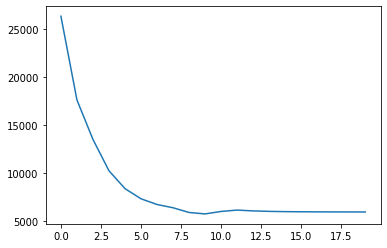

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

Como se pudo observar, el flujo de trabajo es exactamente igual al del anterior ejemplo. En general, todas las tareas de aprendizaje supervisado tienen un flujo similar. En este caso, hemos logrado entrenar un algoritmo de regresión usando una red neuronal de una sola capa. 

## Clasificación: Detección de tumores malignos

Para la tarea de clasificación, usaremos un dataset con datos de 569 pacientes para el diagnóstico de cáncer de mama en base a datos sobre un tumor. En este caso se cuenta con 30 campos numéricos en cada registro. Entre los campos tenemos la siguiente información:

  - Radio (media de las distancias desde el centro a los puntos en el perímetro del tumor)
  - textura (desviación estándar de valores en escala de grises)
  - perímetro
  - área
  - smoothness (variación local en distancias de radios)
  - compactness ($\frac{perimetro^2}{area} - 1$)
  - concavidades (severidad de porciones cóncavas del contorno)
  - puntos cóncavos (número de porciones cóncavas del contorno)
  - simetría
  - dimensión fractal.

Se ha calculado la media, desviación estándar y el peor (media de los 3 peores valores) de las características para cada imagen resultando en 30 campos.

Se tienen 2 clases, 1 = maligno, 0 = benigno.

  

## Obtención del dataset

In [11]:
X, y = load_breast_cancer(return_X_y=True)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# y = (y - np.mean(y)) / np.std(y, axis=1)
print(f'X: {X.shape}, y: {y.shape}')

X: (569, 30), y: (569,)


In [12]:
print(np.std(X, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## Definición del modelo

In [17]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, input_shape=[30], activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

## Compilación del modelo 

In [18]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

## Entrenamiento

In [19]:
history = model.fit(X, y, epochs=100)

Epoch 1/100
18/18 [==============================] - 0s 629us/step - loss: 0.6437
Epoch 2/100
18/18 [==============================] - 0s 509us/step - loss: 0.4877
Epoch 3/100
18/18 [==============================] - 0s 506us/step - loss: 0.3991
Epoch 4/100
18/18 [==============================] - 0s 510us/step - loss: 0.3430
Epoch 5/100
18/18 [==============================] - 0s 523us/step - loss: 0.3036
Epoch 6/100
18/18 [==============================] - 0s 532us/step - loss: 0.2744
Epoch 7/100
18/18 [==============================] - 0s 456us/step - loss: 0.2521
Epoch 8/100
18/18 [==============================] - 0s 439us/step - loss: 0.2342
Epoch 9/100
18/18 [==============================] - 0s 542us/step - loss: 0.2194
Epoch 10/100
18/18 [==============================] - 0s 481us/step - loss: 0.2073
Epoch 11/100
18/18 [==============================] - 0s 534us/step - loss: 0.1969
Epoch 12/100
18/18 [==============================] - 0s 431us/step - loss: 0.1882
Epoch 13/100


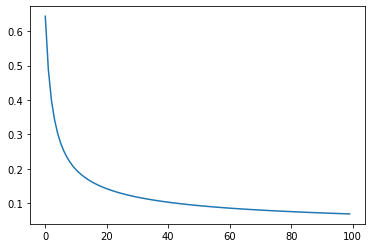

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()